In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data
df = pd.read_csv("experimental_data.csv")

# Define features (X) and target (y)
X = df[['Fe Loading', 'Layer Thickness', 'Infill Density']]
y = df['Surface Roughness']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Step 1 Complete – Data loaded and split!")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Step 1 Complete – Data loaded and split!
X shape: (16, 3)
y shape: (16,)


In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize scalers
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Fit and transform X and y
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Reshape y for scaling
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

print("✅ Step 2 Complete – Features and target normalized")


✅ Step 2 Complete – Features and target normalized


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Store results
results = {}

# 🔹 Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)
y_pred_lr = lr.predict(X_test_scaled)
results["Linear Regression"] = {
    "MSE": mean_squared_error(y_test_scaled, y_pred_lr),
    "R²": r2_score(y_test_scaled, y_pred_lr)
}

# 🔹 Polynomial Regression (Degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_scaled, y_train_scaled)
y_pred_poly = poly_model.predict(X_test_scaled)
results["Polynomial Regression (Deg 2)"] = {
    "MSE": mean_squared_error(y_test_scaled, y_pred_poly),
    "R²": r2_score(y_test_scaled, y_pred_poly)
}

# 🔹 Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_scaled, y_train_scaled)
y_pred_rf = rf.predict(X_test_scaled)
results["Random Forest"] = {
    "MSE": mean_squared_error(y_test_scaled, y_pred_rf),
    "R²": r2_score(y_test_scaled, y_pred_rf)
}

# 🔹 XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train_scaled, y_train_scaled)
y_pred_xgb = xgb.predict(X_test_scaled)
results["XGBoost"] = {
    "MSE": mean_squared_error(y_test_scaled, y_pred_xgb),
    "R²": r2_score(y_test_scaled, y_pred_xgb)
}

# Print results
print("📊 Model Evaluation Results:")
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.4f}, R² = {metrics['R²']:.4f}")


📊 Model Evaluation Results:
Linear Regression: MSE = 0.1028, R² = 0.1887
Polynomial Regression (Deg 2): MSE = 0.0552, R² = 0.5644
Random Forest: MSE = 0.3259, R² = -1.5713
XGBoost: MSE = 0.2824, R² = -1.2278


In [5]:
from sklearn.pipeline import make_pipeline

# Polynomial Regression (Degree 3)
poly3_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly3_model.fit(X_train_scaled, y_train_scaled)
y_pred_poly3 = poly3_model.predict(X_test_scaled)

# Evaluate
mse_poly3 = mean_squared_error(y_test_scaled, y_pred_poly3)
r2_poly3 = r2_score(y_test_scaled, y_pred_poly3)

print(f"🔹 Polynomial Regression (Degree 3): MSE = {mse_poly3:.4f}, R² = {r2_poly3:.4f}")


🔹 Polynomial Regression (Degree 3): MSE = 0.3631, R² = -1.8652


In [6]:
from sklearn.linear_model import Ridge

# Polynomial Ridge Regression (Degree 2)
poly_ridge_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0))
poly_ridge_model.fit(X_train_scaled, y_train_scaled)
y_pred_poly_ridge = poly_ridge_model.predict(X_test_scaled)

# Evaluate
mse_poly_ridge = mean_squared_error(y_test_scaled, y_pred_poly_ridge)
r2_poly_ridge = r2_score(y_test_scaled, y_pred_poly_ridge)

print(f"🔹 Polynomial Ridge Regression (Degree 2): MSE = {mse_poly_ridge:.4f}, R² = {r2_poly_ridge:.4f}")


🔹 Polynomial Ridge Regression (Degree 2): MSE = 0.0773, R² = 0.3899


In [7]:
from sklearn.linear_model import Ridge

# Polynomial Ridge Regression (Degree 2)
poly_ridge_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0))
poly_ridge_model.fit(X_train_scaled, y_train_scaled)
y_pred_poly_ridge = poly_ridge_model.predict(X_test_scaled)

# Evaluate
mse_poly_ridge = mean_squared_error(y_test_scaled, y_pred_poly_ridge)
r2_poly_ridge = r2_score(y_test_scaled, y_pred_poly_ridge)

print(f"🔹 Polynomial Ridge Regression (Degree 2): MSE = {mse_poly_ridge:.4f}, R² = {r2_poly_ridge:.4f}")


🔹 Polynomial Ridge Regression (Degree 2): MSE = 0.0773, R² = 0.3899


In [8]:
# Predict using the best model (Polynomial Regression Degree 2)
y_pred_all_scaled = poly_model.predict(X_scaler.transform(X))

# Inverse-transform the predictions and actual values to original scale
y_pred_all = y_scaler.inverse_transform(y_pred_all_scaled.reshape(-1, 1)).ravel()
y_actual = df['Surface Roughness'].values

# Create comparison table
comparison_df = pd.DataFrame({
    'Run': df.index + 1,
    'Actual Surface Roughness': y_actual,
    'Predicted Surface Roughness': y_pred_all,
    'Error': abs(y_pred_all - y_actual)
})

# Display results
pd.set_option('display.max_rows', None)  # Show all rows
print(comparison_df)

# Calculate overall error metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_actual, y_pred_all)
r2 = r2_score(y_actual, y_pred_all)

print(f"\n✅ Final Validation – Entire Dataset:")
print(f"MSE = {mse:.4f}")
print(f"R² = {r2:.4f}")


    Run  Actual Surface Roughness  Predicted Surface Roughness         Error
0     1                 -0.919578                    -0.608607  3.109705e-01
1     2                 -0.758012                    -0.692865  6.514744e-02
2     3                  1.396197                     1.305859  9.033779e-02
3     4                  2.742577                     2.832915  9.033779e-02
4     5                  0.049816                    -0.349755  3.995710e-01
5     6                 -0.057894                    -0.349755  2.918605e-01
6     7                 -0.865723                    -0.865723  2.553513e-15
7     8                  0.399875                     0.445044  4.516889e-02
8     9                  1.396197                     1.351028  4.516889e-02
9    10                 -0.704157                    -0.349755  3.544021e-01
10   11                 -0.219460                    -0.264629  4.516889e-02
11   12                  1.396197                     1.351028  4.516889e-02

# Tring New Model/ Improvement

In [9]:
import pandas as pd

# Data from Table 4 (Run order, Fe Loading, Layer Thickness, Infill Density, Surface Roughness)
data = {
    "Run": list(range(1, 21)),
    "Fe_Loading": [92, 94, 92, 94, 92, 94, 92, 94, 91, 95, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93],
    "Layer_Thickness": [0.15, 0.15, 0.25, 0.25, 0.15, 0.15, 0.25, 0.25, 0.20, 0.20, 0.10, 0.30, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20],
    "Infill_Density": [60, 60, 60, 60, 80, 80, 80, 80, 70, 70, 70, 70, 50, 90, 70, 70, 70, 70, 70, 70],
    "Surface_Roughness_Actual": [1.45, 2.02, 2.11, 2.98, 1.88, 1.68, 1.65, 1.98, 1.62, 2.48, 1.68, 2.48, 2.48, 1.64, 1.94, 1.80, 1.94, 1.74, 1.98, 1.70]
}

df = pd.DataFrame(data)


In [10]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Features and target
X = df[['Fe_Loading', 'Layer_Thickness', 'Infill_Density']]
y = df['Surface_Roughness_Actual']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and train the model
model_poly_ridge = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0))
model_poly_ridge.fit(X_scaled, y)

# Predict
df['Surface_Roughness_Predicted'] = model_poly_ridge.predict(X_scaled)

# Error calculation
df['Absolute Error'] = abs(df['Surface_Roughness_Actual'] - df['Surface_Roughness_Predicted'])
df['% Error (SR)'] = (df['Absolute Error'] / df['Surface_Roughness_Actual']) * 100

# Evaluation
mae = mean_absolute_error(y, df['Surface_Roughness_Predicted'])
mse = mean_squared_error(y, df['Surface_Roughness_Predicted'])
r2 = r2_score(y, df['Surface_Roughness_Predicted'])
avg_pct_error = df['% Error (SR)'].mean()

print(df[['Surface_Roughness_Actual', 'Surface_Roughness_Predicted', 'Absolute Error', '% Error (SR)']])
print(f"\n✅ Polynomial Ridge Regression (Deg 2):")
print(f"MAE = {mae:.4f}, MSE = {mse:.4f}, R² = {r2:.4f}, Avg % Error = {avg_pct_error:.2f}%")


    Surface_Roughness_Actual  Surface_Roughness_Predicted  Absolute Error  \
0                       1.45                     1.545133        0.095133   
1                       2.02                     2.047911        0.027911   
2                       2.11                     2.103467        0.006533   
3                       2.98                     2.990504        0.010504   
4                       1.88                     1.844075        0.035925   
5                       1.68                     1.740371        0.060371   
6                       1.65                     1.684816        0.034816   
7                       1.98                     1.965371        0.014629   
8                       1.62                     1.633311        0.013311   
9                       2.48                     2.416644        0.063356   
10                      1.68                     1.662723        0.017277   
11                      2.48                     2.446056        0.033944   

In [11]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# 1. Features and Target
X = df[['Fe_Loading', 'Layer_Thickness', 'Infill_Density']]
y = df['Surface_Roughness_Actual']

# 2. Scale Input Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
xgb_model.fit(X_scaled, y)

# 4. Predict Surface Roughness
df['Surface_Roughness_Predicted_XGB'] = xgb_model.predict(X_scaled)

# 5. Calculate Error
df['Absolute Error (XGB)'] = abs(df['Surface_Roughness_Actual'] - df['Surface_Roughness_Predicted_XGB'])
df['% Error (XGB)'] = (df['Absolute Error (XGB)'] / df['Surface_Roughness_Actual']) * 100

# 6. Evaluation Metrics
mae_xgb = mean_absolute_error(y, df['Surface_Roughness_Predicted_XGB'])
mse_xgb = mean_squared_error(y, df['Surface_Roughness_Predicted_XGB'])
r2_xgb = r2_score(y, df['Surface_Roughness_Predicted_XGB'])
avg_pct_error_xgb = df['% Error (XGB)'].mean()

# 7. Display Results
print(df[['Surface_Roughness_Actual', 'Surface_Roughness_Predicted_XGB', 'Absolute Error (XGB)', '% Error (XGB)']])
print(f"\n✅ XGBoost Model Performance:")
print(f"MAE = {mae_xgb:.4f}, MSE = {mse_xgb:.4f}, R² = {r2_xgb:.4f}, Avg % Error = {avg_pct_error_xgb:.2f}%")


    Surface_Roughness_Actual  Surface_Roughness_Predicted_XGB  \
0                       1.45                         1.473654   
1                       2.02                         2.020984   
2                       2.11                         2.090978   
3                       2.98                         2.969686   
4                       1.88                         1.851399   
5                       1.68                         1.685248   
6                       1.65                         1.675269   
7                       1.98                         1.981065   
8                       1.62                         1.621411   
9                       2.48                         2.477014   
10                      1.68                         1.685112   
11                      2.48                         2.479002   
12                      2.48                         2.478779   
13                      1.64                         1.640601   
14                      1

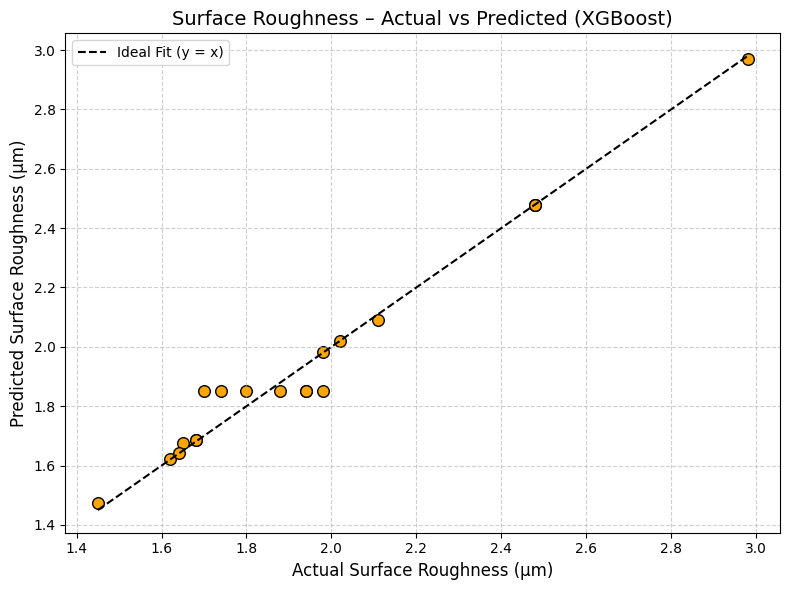

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Surface_Roughness_Actual'], df['Surface_Roughness_Predicted_XGB'], color='orange', edgecolor='black', s=70)
plt.plot([df['Surface_Roughness_Actual'].min(), df['Surface_Roughness_Actual'].max()],
         [df['Surface_Roughness_Actual'].min(), df['Surface_Roughness_Actual'].max()],
         linestyle='--', color='black', label='Ideal Fit (y = x)')

plt.title("Surface Roughness – Actual vs Predicted (XGBoost)", fontsize=14)
plt.xlabel("Actual Surface Roughness (μm)", fontsize=12)
plt.ylabel("Predicted Surface Roughness (μm)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


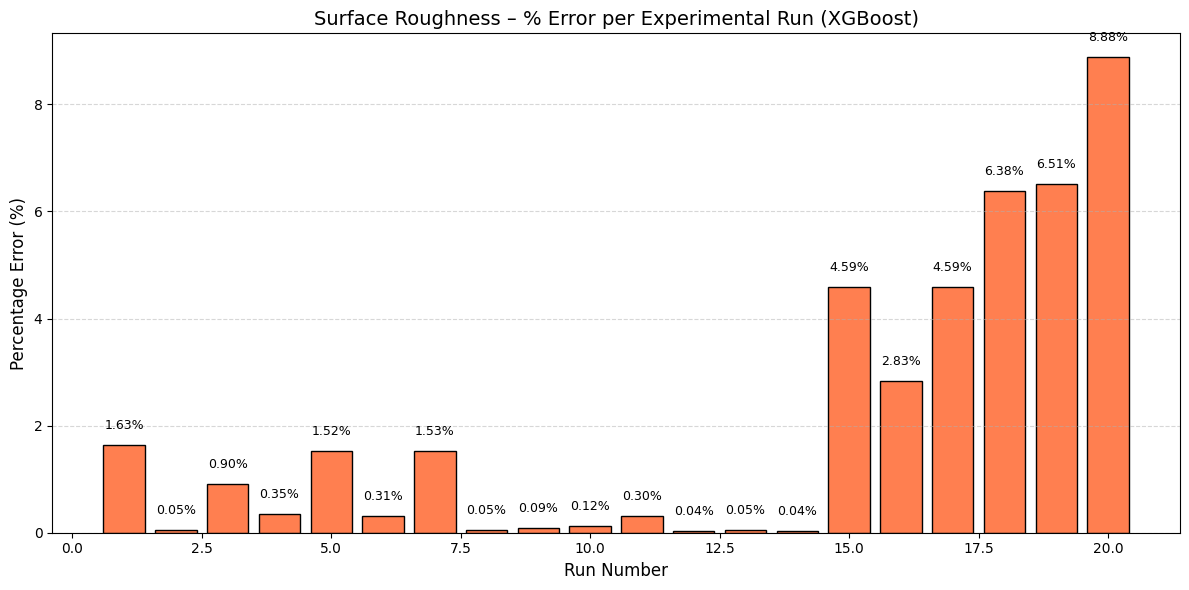

In [13]:
plt.figure(figsize=(12, 6))
bars = plt.bar(df.index + 1, df['% Error (XGB)'], color='coral', edgecolor='black')

# Add % labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f"{height:.2f}%", ha='center', fontsize=9)

plt.xlabel("Run Number", fontsize=12)
plt.ylabel("Percentage Error (%)", fontsize=12)
plt.title("Surface Roughness – % Error per Experimental Run (XGBoost)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


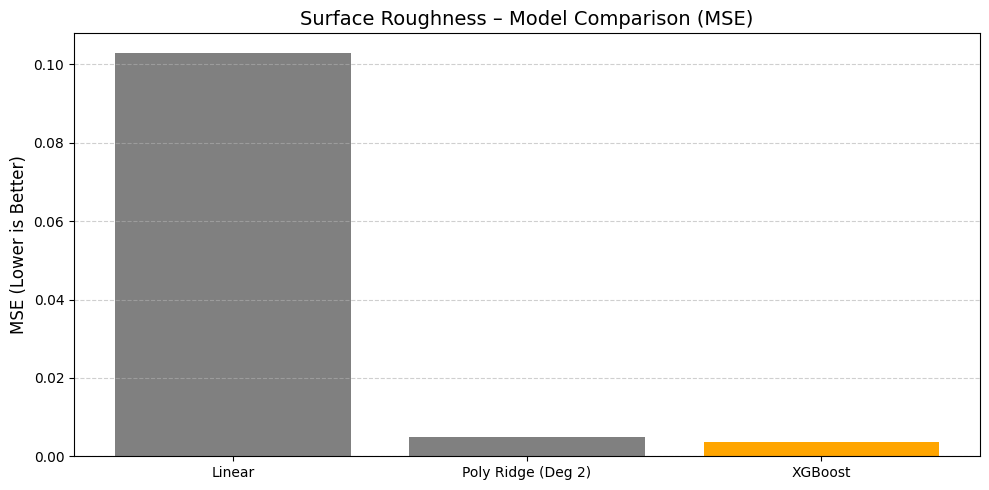

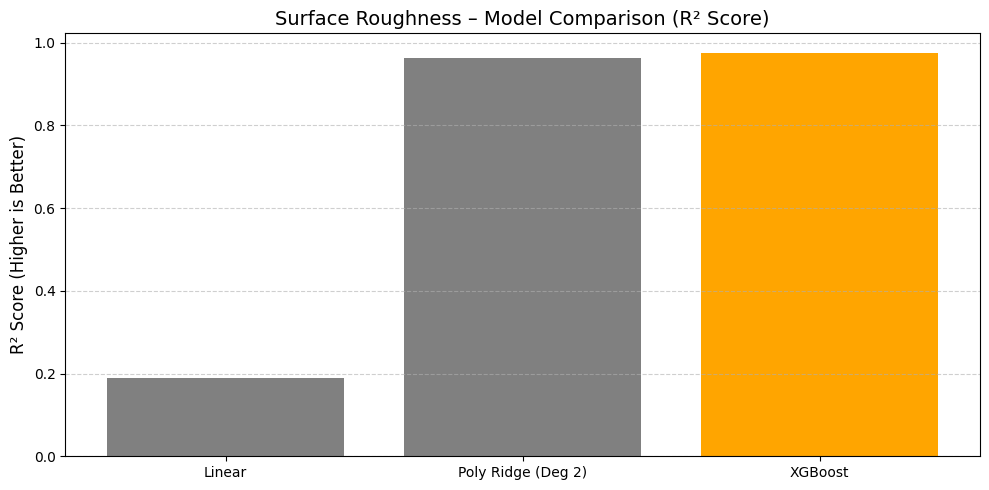

In [14]:
# Model names and their metrics
models = ['Linear', 'Poly Ridge (Deg 2)', 'XGBoost']
mse_vals = [0.1028, 0.0050, 0.0036]   # example MSEs
r2_vals = [0.1887, 0.9637, 0.9736]    # example R²s

# Plot MSE comparison
plt.figure(figsize=(10, 5))
plt.bar(models, mse_vals, color=['gray', 'gray', 'orange'])
plt.title("Surface Roughness – Model Comparison (MSE)", fontsize=14)
plt.ylabel("MSE (Lower is Better)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot R² comparison
plt.figure(figsize=(10, 5))
plt.bar(models, r2_vals, color=['gray', 'gray', 'orange'])
plt.title("Surface Roughness – Model Comparison (R² Score)", fontsize=14)
plt.ylabel("R² Score (Higher is Better)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


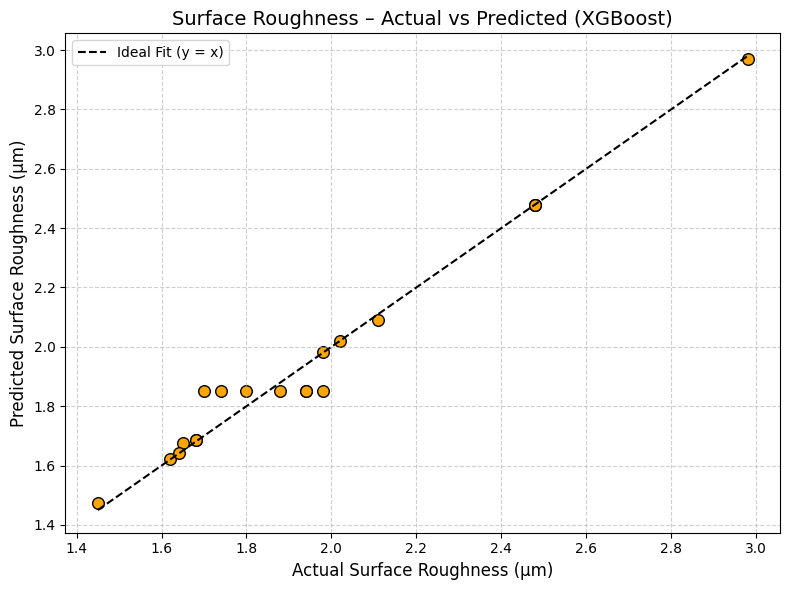

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Surface_Roughness_Actual'], df['Surface_Roughness_Predicted_XGB'],
            color='orange', edgecolor='black', s=70)
plt.plot([df['Surface_Roughness_Actual'].min(), df['Surface_Roughness_Actual'].max()],
         [df['Surface_Roughness_Actual'].min(), df['Surface_Roughness_Actual'].max()],
         linestyle='--', color='black', label='Ideal Fit (y = x)')

plt.title("Surface Roughness – Actual vs Predicted (XGBoost)", fontsize=14)
plt.xlabel("Actual Surface Roughness (μm)", fontsize=12)
plt.ylabel("Predicted Surface Roughness (μm)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# ✅ Save the chart
plt.savefig("surface_roughness_actual_vs_predicted.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


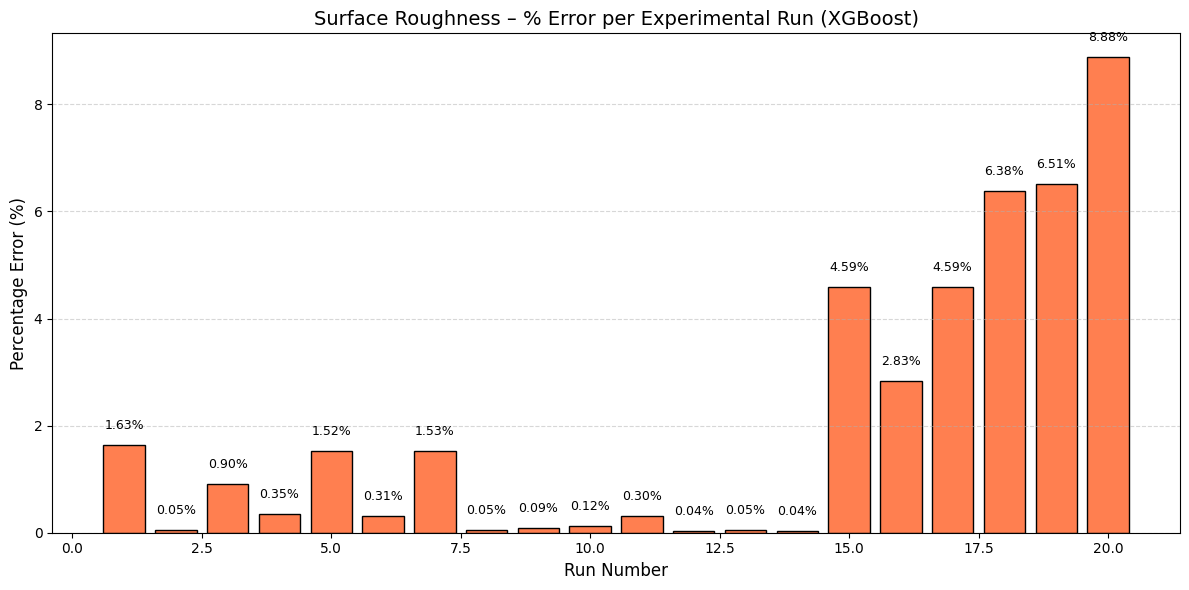

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(df.index + 1, df['% Error (XGB)'], color='coral', edgecolor='black')

# Add % labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f"{height:.2f}%", ha='center', fontsize=9)

plt.xlabel("Run Number", fontsize=12)
plt.ylabel("Percentage Error (%)", fontsize=12)
plt.title("Surface Roughness – % Error per Experimental Run (XGBoost)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# ✅ Save the chart
plt.savefig("surface_roughness_percent_error_xgb.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
